In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
import sklearn.metrics
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
analyzer = SentimentIntensityAnalyzer()

In [3]:
data_test = pd.read_excel("../Excel/test_data_v5.xlsx",index_col=0)
data_test

,sentence,sentiment,question,length
0,12 hours until I can buy the dip. I won’t be s...,positive,0.0,18.0
1,38k. Not too shabby. \nLets shoot the btc rock...,positive,0.0,14.0
2,4 hour bull div locked in. We have bottomed. C...,positive,0.0,10.0
3,40k feels good now,positive,0.0,4.0
4,40k test I feel it has alot more gas and is we...,positive,0.0,17.0
...,...,...,...,...
995,I picked the wrong week,negative,NaN,NaN
996,Stupid fucking Russia,negative,NaN,NaN
997,Lets try to catch the falling knife,negative,NaN,NaN
998,Zero chance.,negative,NaN,NaN


In [4]:
with open('list_2words.pkl', 'rb') as f: # rb : binary 파일 읽기
    two_words = pickle.load(f)

In [5]:
def two2one(sentence):
    for two_word in two_words:
        if two_word in sentence:
            sentence = sentence.replace(two_word, two_word.split()[0]+"_"+two_word.split()[1])
    return sentence

In [6]:
data_test['length'] = data_test['sentence'].apply(lambda x : len(x.split()))
data_test['sentence'] = data_test['sentence'].apply(two2one) # 2 단어 이상 합쳐진 단어들을 하나로
data_test['polarity_scores'] = data_test['sentence'].apply(analyzer.polarity_scores)
data_test['compound'] = data_test['polarity_scores'].apply(lambda x: x['compound'])

data_test_1 = data_test[data_test['length']<=5]
data_test_2 = data_test[(5 <data_test['length'])&(data_test['length']<=10)]
data_test_3 = data_test[(10 <data_test['length'])&(data_test['length']<=15)]
data_test_4 = data_test[(15 <data_test['length'])&(data_test['length']<=20)]
data_test_5 = data_test[(20 <data_test['length'])&(data_test['length']<=25)]
data_test_6 = data_test[(25 <data_test['length'])&(data_test['length']<=30)]
data_test_7 = data_test[(30 <data_test['length'])&(data_test['length']<=35)]
data_test_8 = data_test[(35 <data_test['length'])]

In [8]:
data_test[data_test['compound']==0]

,sentence,sentiment,question,length,polarity_scores,compound
438,"Fookin hell, if we dip any lower I'm gonna hav...",negative,0.0,14,"{'neg': 0.292, 'neu': 0.417, 'pos': 0.292, 'co...",0.0
469,"when in doubt, zoom_out",positive,0.0,5,"{'neg': 0.365, 'neu': 0.27, 'pos': 0.365, 'com...",0.0
470,Zoom out. 🦑,positive,0.0,3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
476,Bye bye paper hands,positive,0.0,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
477,Don’t be the person that sells your coins to b...,positive,0.0,16,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
...,...,...,...,...,...,...
916,sell.sell.sell,negative,NaN,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
917,no.no.no,negative,NaN,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
919,really wanting to throw_in…,negative,NaN,5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
961,I have allegy to BTC,negative,NaN,5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0


data_test = data_test_8.reset_index(drop = True)

In [20]:
def sent(x):
    if x > 0:
        return 'positive'
    elif x == 0:
        return 'neutral'
    else:
        return 'negative'

In [ ]:
def sent_bi():
    if 

In [21]:
data_test['vader_sentiment'] = data_test['compound'].apply(sent)

In [22]:
data_test['vader_sentiment'][0]

'positive'

In [23]:
confusion_matrix(y_true=data_test['sentiment'], y_pred=data_test['vader_sentiment'], labels=['positive', 'neutral', 'negative']) 

array([[425,  29,  46],
       [  0,   0,   0],
       [ 93,  45, 362]], dtype=int64)

In [24]:
confusion_matrix = confusion_matrix(y_true=data_test['sentiment'], y_pred=data_test['vader_sentiment'], labels=['positive', 'neutral', 'negative']) 

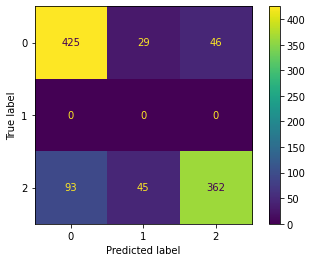

In [25]:
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix)
disp.plot()

plt.savefig('lexicon_v3_1.png')
plt.show()

In [13]:
two2one("throw in")

'throw_in'

# 잘못 분류된 Data 확인

In [52]:
data_re = data_test[["sentence","sentiment","vader_sentiment"]]

In [53]:
data_re1 = data_re[data_re["sentiment"] != data_re["vader_sentiment"]]
data_re1 = data_re1.reset_index(drop = True)
data_re1.to_excel("sentences_add_99.xlsx")
data_re1

,sentence,sentiment,vader_sentiment
0,2022 is gonna be big for crypto!,positive,neutral
1,"Come on ATOM, only $1 away from new ATH!",positive,neutral
2,come on death cross make me some money!,positive,negative
3,"Damn I envy you, just got in last week",positive,negative
4,Hello future millionaire!,positive,neutral
...,...,...,...
123,"Down, down, down with this shitcoin.",negative,neutral
124,Lol bitcoin you fucking crazy,negative,positive
125,What a wild market.,negative,neutral
126,Cold 🥶 storage boyz,negative,neutral


In [54]:
data_re2 = data_re[data_re["sentiment"] == data_re["vader_sentiment"]]
data_re2 = data_re2.reset_index(drop = True)
data_re2.to_excel("sentences_add_98.xlsx")
data_re2

,sentence,sentiment,vader_sentiment
0,2022 feels like a good year for crytpo.,positive,positive
1,A new daily! Let’s make some gains today!,positive,positive
2,Ada.... Good time to short it guys.,positive,positive
3,Alright guys i’m gonna sell so we can rocket,positive,positive
4,Bought more CRO! Let’s gooo! :D,positive,positive
...,...,...,...
197,so sad,negative,negative
198,That's ever so tragic,negative,negative
199,For fucks sake,negative,negative
200,Fuck you bitcoin,negative,negative
